## Design 0 
<img src= Design0.png  width="300" height="300">

In [9]:
# Area calculation
A1  = 100 * 1.27
A2 = 1.27* 6.27
A3 = 1.27*(75-1.27*2)
A4 = 1.27*80

# yb
y1 = 75+ 1.27/2
y2 = 75 - 1.27/2
y3 = 75/2
y4 = 1.27/2
# y_bar
y_bar = (A1*y1 + 2*A2*y2 + 2*A3*y3 + A4*y4)/(A1+2*A2+2*A3+A4)
print(f"y_bar = {y_bar} mm")

I = (100*1.27**3)/12+ 2*(6.27*1.27**3)/12+ 2*(1.27*(75-2*1.27)**3/12) +80*1.27**3/12  +(A1*(y1-y_bar)**2 + 2*A2*(y2-y_bar)**2 + 2*A3*(y3-y_bar)**2 + A4*(y4-y_bar)**2)
print(f"I = {I} mm^4")

y_bar = 41.431094351923186 mm
I = 418352.20899942354 mm^4


In [10]:
length = 1200
loading_locs = [0,172,348,512,688,852,1028,1200]
loads = [400/6,400/6,400/6,400/6,90,90]
temp_m_a = 0
for i in range(len(loads)):
    temp_m_a += loads[i] * loading_locs[i+1]
r_hy = temp_m_a/length
r_ay = (400 * (2/3) + 180) - r_hy
print(r_ay)



210.11111111111106


In [11]:
sfd_vals = [r_ay]
bmd_vals = [0]
for i in range(len(loads)):
    v = sfd_vals[i] - loads[i]
    sfd_vals.append(v)
print(sfd_vals)
for i in range(len(sfd_vals)):
    m = (loading_locs[i+1] - loading_locs[i]) * sfd_vals[i] + bmd_vals[i]
    bmd_vals.append(m)
print(bmd_vals)
m_max = max(bmd_vals)
print(m_max)
    

[210.11111111111106, 143.4444444444444, 76.77777777777773, 10.111111111111057, -56.555555555555614, -146.5555555555556, -236.5555555555556]
[0, 36139.1111111111, 61385.333333333314, 73976.88888888886, 75756.44444444441, 66481.33333333328, 40687.555555555504, -5.820766091346741e-11]
75756.44444444441


In [12]:

sigma_max_t = m_max * y_bar/I
print(f"Tension stress at the bottom = {sigma_max_t} MPa")
sigma_max_c = m_max * (75+1.27-y_bar)/I
print(f"Compression stress at the top = {sigma_max_c} MPa")


Tension stress at the bottom = 7.502464024394164 MPa
Compression stress at the top = 6.308731168280763 MPa


In [13]:
#FOS 
FOS_t = 30/sigma_max_t
FOS_c = 6/sigma_max_c
print(f"FOS in tension = {FOS_t}")
print(f"FOS in compression = {FOS_c}")

FOS in tension = 3.9986862852598017
FOS in compression = 0.9510628746025807


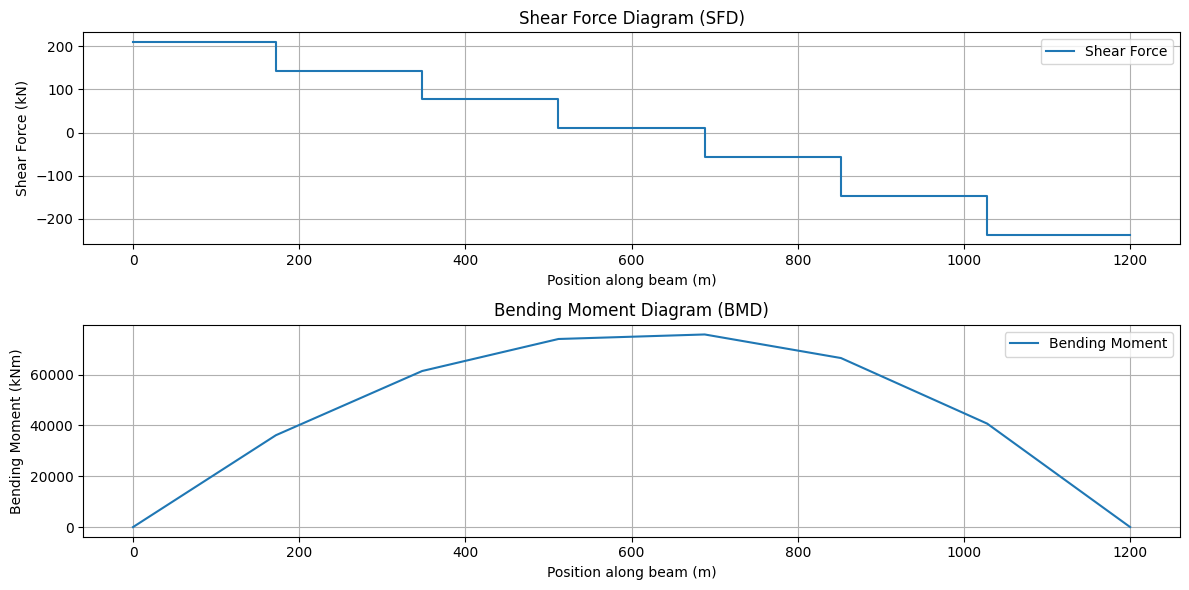

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Beam properties
beam_length = 1200  # in milimeters

point_load = -20  # negative for downward load, in kN
load_position = 4  # position of point load from left support, in meters

# Support reactions (assuming static equilibrium and a simply supported beam)
reaction_left = -point_load * (beam_length - load_position) / beam_length
reaction_right = -point_load * load_position / beam_length

# Function to calculate shear force at a given point
def shear_force(x):
    if x < load_position:
        return reaction_left
    else:
        return reaction_left + point_load

# Function to calculate bending moment at a given point
def bending_moment(x):
    if x < load_position:
        return reaction_left * x
    else:
        return reaction_left * x + point_load * (x - load_position)

# Points to evaluate
loading_locs = [0,172,348,512,688,852,1028,1200]
sf_points = np.linspace(0, beam_length, 7)
bm_points = np.linspace(0, beam_length, 8)
sf_values = [210.11111111111106, 210.11111111111106, 143.4444444444444, 76.77777777777773, 10.111111111111057, -56.555555555555614, -146.5555555555556, -236.5555555555556]
bm_values = [0, 36139.1111111111, 61385.333333333314, 73976.88888888886, 75756.44444444441, 66481.33333333328, 40687.555555555504, -5.820766091346741e-11]

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(loading_locs, sf_values, label="Shear Force", drawstyle='steps-pre')
plt.xlabel("Position along beam (m)")
plt.ylabel("Shear Force (kN)")
plt.title("Shear Force Diagram (SFD)")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loading_locs, bm_values, label="Bending Moment")
plt.xlabel("Position along beam (m)")
plt.ylabel("Bending Moment (kNm)")
plt.title("Bending Moment Diagram (BMD)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
